# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 35kB/s  eta 0:00:01   23% |███████▌                        | 3.4MB 36.9MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

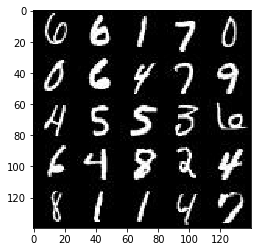

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

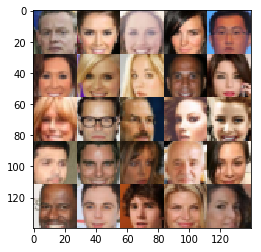

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start\n    handler_func(fd_obj, events)', 'File "/opt/conda/lib/

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [16]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x1 = tf.nn.dropout(x1, 0.7)
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        dr2 = tf.nn.dropout(bn2, 0.7)
        relu2 = tf.maximum(alpha * dr2, dr2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        dr3 = tf.nn.dropout(bn3, 0.7)
        relu3 = tf.maximum(alpha * dr3, dr3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits

    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [18]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse = not is_train):
        x1 = tf.layers.dense(z, 7*7*512)

        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.nn.dropout(x1, 0.7)
        x1 = tf.maximum(alpha * x1, x1)
        
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.nn.dropout(x2, 0.7)
        x2 = tf.maximum(alpha * x2, x2)
        
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.nn.dropout(x3, 0.7)
        x3 = tf.maximum(alpha * x3, x3)
        

        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
       
        out = tf.tanh(logits) 
   
    return out
    
#the other configuration for generator conv layers:

       # x1 = tf.layers.dense(z, 2*2*512)
       # x1 = tf.reshape(h1, (-1, 2, 2, 512))
       # x1 = tf.layers.batch_normalization(h1, training=is_train)
        #x1 = tf.maximum(alpha * h1, h1)
        #x1 = tf.nn.dropout(x1, 0.5)
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [19]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function...eh this is complicated:-/
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss    
    
    
    #return None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [20]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [22]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    images_count, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, l_r = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, l_r, beta1)
    
    steps = 0
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1

                # Change the range from (-0.5, 0.5) to (-1, 1) to be consistent with batch_z
                batch_images *= 2
                #print("Min/Max: {} / {}".format(np.min(batch_images), np.max(batch_images)))
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, l_r: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, l_r: learning_rate})

                if steps % 10 == 0:
                    # Get the losses and print them out after each 10 steps
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discr. Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discr. Loss: 0.8028... Generator Loss: 1.6788
Epoch 1/2... Discr. Loss: 1.2623... Generator Loss: 2.9012
Epoch 1/2... Discr. Loss: 1.3743... Generator Loss: 2.7407
Epoch 1/2... Discr. Loss: 0.3955... Generator Loss: 2.3524
Epoch 1/2... Discr. Loss: 1.1653... Generator Loss: 0.9791
Epoch 1/2... Discr. Loss: 0.9734... Generator Loss: 1.4188
Epoch 1/2... Discr. Loss: 0.8578... Generator Loss: 2.2032
Epoch 1/2... Discr. Loss: 1.3706... Generator Loss: 2.4443
Epoch 1/2... Discr. Loss: 1.4967... Generator Loss: 0.6024
Epoch 1/2... Discr. Loss: 1.3408... Generator Loss: 2.1469


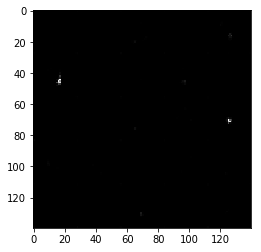

Epoch 1/2... Discr. Loss: 1.3716... Generator Loss: 0.5994
Epoch 1/2... Discr. Loss: 1.3850... Generator Loss: 2.0030
Epoch 1/2... Discr. Loss: 1.1113... Generator Loss: 2.2467
Epoch 1/2... Discr. Loss: 1.1510... Generator Loss: 0.7937
Epoch 1/2... Discr. Loss: 1.6135... Generator Loss: 0.5162
Epoch 1/2... Discr. Loss: 1.2248... Generator Loss: 0.8775
Epoch 1/2... Discr. Loss: 0.7502... Generator Loss: 2.1881
Epoch 1/2... Discr. Loss: 0.8932... Generator Loss: 1.9412
Epoch 1/2... Discr. Loss: 1.1991... Generator Loss: 0.8154
Epoch 1/2... Discr. Loss: 0.8835... Generator Loss: 1.3517


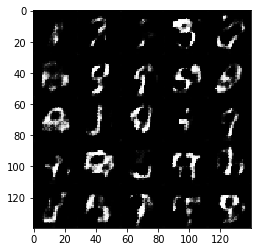

Epoch 1/2... Discr. Loss: 1.5763... Generator Loss: 1.2326
Epoch 1/2... Discr. Loss: 1.1918... Generator Loss: 1.0546
Epoch 1/2... Discr. Loss: 1.2993... Generator Loss: 0.6621
Epoch 1/2... Discr. Loss: 1.0906... Generator Loss: 1.1486
Epoch 1/2... Discr. Loss: 1.3538... Generator Loss: 0.8493
Epoch 1/2... Discr. Loss: 1.2061... Generator Loss: 1.0343
Epoch 1/2... Discr. Loss: 1.2234... Generator Loss: 1.2726
Epoch 1/2... Discr. Loss: 1.2644... Generator Loss: 1.3128
Epoch 1/2... Discr. Loss: 1.2680... Generator Loss: 0.6950
Epoch 1/2... Discr. Loss: 1.2074... Generator Loss: 1.1422


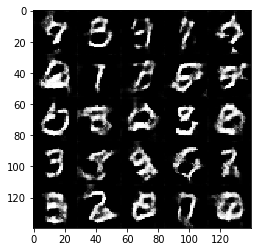

Epoch 1/2... Discr. Loss: 1.3440... Generator Loss: 0.7436
Epoch 1/2... Discr. Loss: 1.3055... Generator Loss: 0.5948
Epoch 1/2... Discr. Loss: 1.1699... Generator Loss: 1.2714
Epoch 1/2... Discr. Loss: 1.2580... Generator Loss: 1.4227
Epoch 1/2... Discr. Loss: 1.0592... Generator Loss: 0.9010
Epoch 1/2... Discr. Loss: 1.2405... Generator Loss: 1.3391
Epoch 1/2... Discr. Loss: 1.2497... Generator Loss: 1.2863
Epoch 1/2... Discr. Loss: 1.1196... Generator Loss: 1.2191
Epoch 1/2... Discr. Loss: 1.1074... Generator Loss: 1.0923
Epoch 1/2... Discr. Loss: 1.1762... Generator Loss: 0.9799


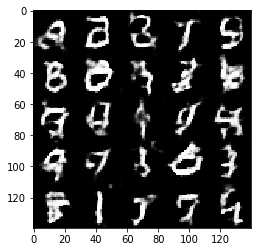

Epoch 1/2... Discr. Loss: 1.1589... Generator Loss: 1.3636
Epoch 1/2... Discr. Loss: 1.1162... Generator Loss: 1.1675
Epoch 1/2... Discr. Loss: 1.0991... Generator Loss: 1.4141
Epoch 1/2... Discr. Loss: 1.1387... Generator Loss: 0.7122
Epoch 1/2... Discr. Loss: 1.2333... Generator Loss: 0.4389
Epoch 1/2... Discr. Loss: 1.0867... Generator Loss: 1.1643
Epoch 2/2... Discr. Loss: 1.2486... Generator Loss: 1.7872
Epoch 2/2... Discr. Loss: 1.1376... Generator Loss: 1.1140
Epoch 2/2... Discr. Loss: 1.2439... Generator Loss: 0.6667
Epoch 2/2... Discr. Loss: 1.0808... Generator Loss: 1.0313


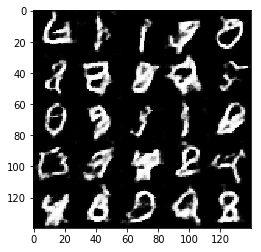

Epoch 2/2... Discr. Loss: 1.0922... Generator Loss: 1.0680
Epoch 2/2... Discr. Loss: 1.3310... Generator Loss: 2.2201
Epoch 2/2... Discr. Loss: 1.1368... Generator Loss: 1.1415
Epoch 2/2... Discr. Loss: 1.0277... Generator Loss: 0.9499
Epoch 2/2... Discr. Loss: 0.9712... Generator Loss: 0.9322
Epoch 2/2... Discr. Loss: 1.1354... Generator Loss: 1.7983
Epoch 2/2... Discr. Loss: 1.1019... Generator Loss: 1.0634
Epoch 2/2... Discr. Loss: 1.2508... Generator Loss: 0.6043
Epoch 2/2... Discr. Loss: 1.0175... Generator Loss: 0.9437
Epoch 2/2... Discr. Loss: 1.1759... Generator Loss: 1.4761


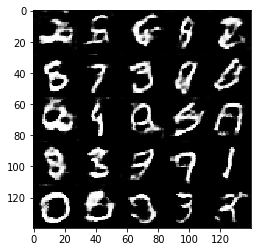

Epoch 2/2... Discr. Loss: 1.0339... Generator Loss: 1.0438
Epoch 2/2... Discr. Loss: 1.3467... Generator Loss: 0.5542
Epoch 2/2... Discr. Loss: 1.2264... Generator Loss: 0.9438
Epoch 2/2... Discr. Loss: 1.0207... Generator Loss: 1.0453
Epoch 2/2... Discr. Loss: 1.0455... Generator Loss: 0.9416
Epoch 2/2... Discr. Loss: 1.0545... Generator Loss: 1.1365
Epoch 2/2... Discr. Loss: 0.9676... Generator Loss: 1.0226
Epoch 2/2... Discr. Loss: 1.1587... Generator Loss: 0.8859
Epoch 2/2... Discr. Loss: 1.1567... Generator Loss: 1.9194
Epoch 2/2... Discr. Loss: 1.1147... Generator Loss: 1.0332


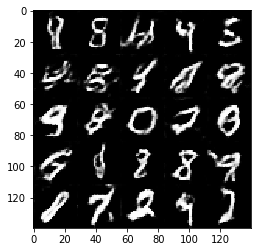

Epoch 2/2... Discr. Loss: 1.2062... Generator Loss: 1.0613
Epoch 2/2... Discr. Loss: 1.0484... Generator Loss: 0.9563
Epoch 2/2... Discr. Loss: 0.9655... Generator Loss: 1.0038
Epoch 2/2... Discr. Loss: 1.1306... Generator Loss: 0.9970
Epoch 2/2... Discr. Loss: 1.1253... Generator Loss: 1.4154
Epoch 2/2... Discr. Loss: 1.0884... Generator Loss: 0.9352
Epoch 2/2... Discr. Loss: 1.1803... Generator Loss: 1.4551
Epoch 2/2... Discr. Loss: 1.1977... Generator Loss: 0.6794
Epoch 2/2... Discr. Loss: 1.1932... Generator Loss: 0.8697
Epoch 2/2... Discr. Loss: 1.2143... Generator Loss: 1.5079


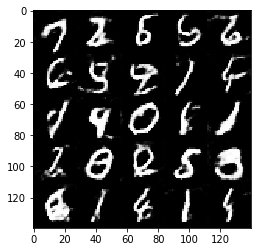

Epoch 2/2... Discr. Loss: 1.2378... Generator Loss: 0.6570
Epoch 2/2... Discr. Loss: 1.2018... Generator Loss: 0.9547
Epoch 2/2... Discr. Loss: 1.0892... Generator Loss: 0.7108
Epoch 2/2... Discr. Loss: 1.0830... Generator Loss: 1.0343
Epoch 2/2... Discr. Loss: 1.2459... Generator Loss: 1.2608
Epoch 2/2... Discr. Loss: 1.0701... Generator Loss: 1.1211
Epoch 2/2... Discr. Loss: 1.0271... Generator Loss: 1.2914
Epoch 2/2... Discr. Loss: 1.1822... Generator Loss: 1.0806
Epoch 2/2... Discr. Loss: 1.1155... Generator Loss: 0.7149
Epoch 2/2... Discr. Loss: 1.1766... Generator Loss: 0.9067


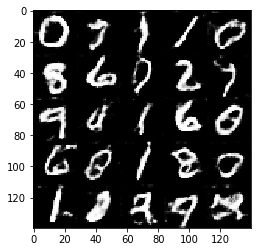

Epoch 2/2... Discr. Loss: 0.9709... Generator Loss: 1.2151
Epoch 2/2... Discr. Loss: 1.0196... Generator Loss: 0.8422
Epoch 2/2... Discr. Loss: 1.2090... Generator Loss: 1.7139


In [23]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/4... Discr. Loss: 0.2501... Generator Loss: 3.4877
Epoch 1/4... Discr. Loss: 0.4028... Generator Loss: 5.9254
Epoch 1/4... Discr. Loss: 0.0994... Generator Loss: 4.4264
Epoch 1/4... Discr. Loss: 0.6553... Generator Loss: 4.2172
Epoch 1/4... Discr. Loss: 0.4061... Generator Loss: 2.3021
Epoch 1/4... Discr. Loss: 0.2225... Generator Loss: 3.2287
Epoch 1/4... Discr. Loss: 0.2504... Generator Loss: 2.9699
Epoch 1/4... Discr. Loss: 0.2097... Generator Loss: 3.3438
Epoch 1/4... Discr. Loss: 0.0759... Generator Loss: 4.2894
Epoch 1/4... Discr. Loss: 0.0769... Generator Loss: 4.4857


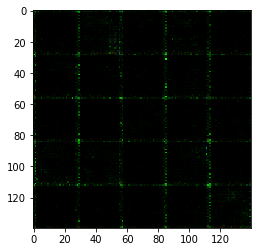

Epoch 1/4... Discr. Loss: 0.0875... Generator Loss: 3.7700
Epoch 1/4... Discr. Loss: 11.8034... Generator Loss: 13.6887
Epoch 1/4... Discr. Loss: 0.7664... Generator Loss: 1.6336
Epoch 1/4... Discr. Loss: 0.3680... Generator Loss: 2.3287
Epoch 1/4... Discr. Loss: 0.3050... Generator Loss: 2.5922
Epoch 1/4... Discr. Loss: 0.2809... Generator Loss: 2.2630
Epoch 1/4... Discr. Loss: 0.1203... Generator Loss: 3.2436
Epoch 1/4... Discr. Loss: 0.7530... Generator Loss: 1.2259
Epoch 1/4... Discr. Loss: 0.4875... Generator Loss: 2.1202
Epoch 1/4... Discr. Loss: 0.6064... Generator Loss: 1.2377


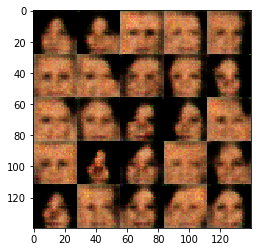

Epoch 1/4... Discr. Loss: 3.5330... Generator Loss: 4.9560
Epoch 1/4... Discr. Loss: 0.4982... Generator Loss: 1.6649
Epoch 1/4... Discr. Loss: 0.7299... Generator Loss: 1.0044
Epoch 1/4... Discr. Loss: 0.6224... Generator Loss: 1.5641
Epoch 1/4... Discr. Loss: 0.4352... Generator Loss: 2.0504
Epoch 1/4... Discr. Loss: 0.5989... Generator Loss: 2.0444
Epoch 1/4... Discr. Loss: 0.5902... Generator Loss: 1.6395
Epoch 1/4... Discr. Loss: 0.7065... Generator Loss: 2.0551
Epoch 1/4... Discr. Loss: 1.7110... Generator Loss: 4.4422
Epoch 1/4... Discr. Loss: 0.8857... Generator Loss: 1.2032


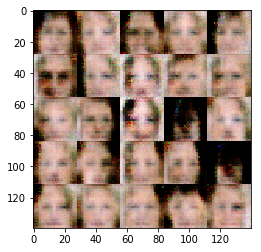

Epoch 1/4... Discr. Loss: 1.0073... Generator Loss: 0.7170
Epoch 1/4... Discr. Loss: 1.0327... Generator Loss: 0.6380
Epoch 1/4... Discr. Loss: 0.6463... Generator Loss: 1.6596
Epoch 1/4... Discr. Loss: 0.7632... Generator Loss: 2.6971
Epoch 1/4... Discr. Loss: 1.3448... Generator Loss: 0.8061
Epoch 1/4... Discr. Loss: 1.1641... Generator Loss: 0.6125
Epoch 1/4... Discr. Loss: 0.8708... Generator Loss: 1.1831
Epoch 1/4... Discr. Loss: 3.0750... Generator Loss: 4.8809
Epoch 1/4... Discr. Loss: 1.1343... Generator Loss: 1.1899
Epoch 1/4... Discr. Loss: 1.2753... Generator Loss: 0.9840


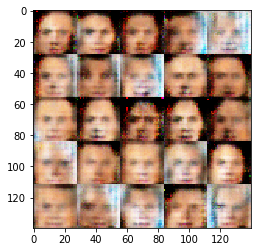

Epoch 1/4... Discr. Loss: 0.9529... Generator Loss: 1.0749
Epoch 1/4... Discr. Loss: 1.0436... Generator Loss: 1.3782
Epoch 1/4... Discr. Loss: 0.7906... Generator Loss: 0.8869
Epoch 1/4... Discr. Loss: 1.2064... Generator Loss: 1.1325
Epoch 1/4... Discr. Loss: 2.1164... Generator Loss: 0.2073
Epoch 1/4... Discr. Loss: 1.0398... Generator Loss: 1.0212
Epoch 1/4... Discr. Loss: 1.2902... Generator Loss: 0.8875
Epoch 1/4... Discr. Loss: 0.9810... Generator Loss: 0.8013
Epoch 1/4... Discr. Loss: 0.7468... Generator Loss: 1.4213
Epoch 1/4... Discr. Loss: 1.2249... Generator Loss: 0.7088


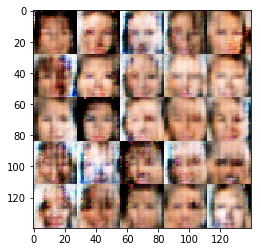

Epoch 1/4... Discr. Loss: 1.0171... Generator Loss: 1.1172
Epoch 1/4... Discr. Loss: 0.8714... Generator Loss: 1.1662
Epoch 1/4... Discr. Loss: 1.2365... Generator Loss: 0.8056
Epoch 1/4... Discr. Loss: 1.0278... Generator Loss: 0.8673
Epoch 1/4... Discr. Loss: 1.1861... Generator Loss: 0.8299
Epoch 1/4... Discr. Loss: 1.2362... Generator Loss: 0.5590
Epoch 1/4... Discr. Loss: 1.0643... Generator Loss: 0.9322
Epoch 1/4... Discr. Loss: 0.8895... Generator Loss: 1.3479
Epoch 1/4... Discr. Loss: 1.1713... Generator Loss: 1.5770
Epoch 1/4... Discr. Loss: 1.1673... Generator Loss: 1.0511


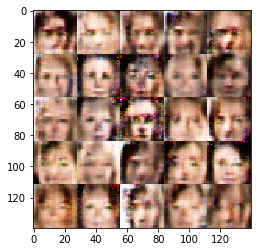

Epoch 1/4... Discr. Loss: 0.8388... Generator Loss: 1.1578
Epoch 1/4... Discr. Loss: 1.3538... Generator Loss: 0.6479
Epoch 1/4... Discr. Loss: 1.0912... Generator Loss: 1.1780
Epoch 1/4... Discr. Loss: 1.1431... Generator Loss: 0.9577
Epoch 1/4... Discr. Loss: 1.5321... Generator Loss: 0.4165
Epoch 1/4... Discr. Loss: 1.3766... Generator Loss: 1.4938
Epoch 1/4... Discr. Loss: 1.1616... Generator Loss: 0.9327
Epoch 1/4... Discr. Loss: 1.2582... Generator Loss: 0.7058
Epoch 1/4... Discr. Loss: 1.2052... Generator Loss: 0.6182
Epoch 1/4... Discr. Loss: 1.4342... Generator Loss: 0.8812


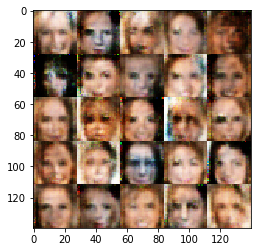

Epoch 1/4... Discr. Loss: 1.1200... Generator Loss: 1.1701
Epoch 1/4... Discr. Loss: 1.4467... Generator Loss: 0.5082
Epoch 1/4... Discr. Loss: 1.2121... Generator Loss: 1.1661
Epoch 1/4... Discr. Loss: 1.1225... Generator Loss: 1.1895
Epoch 1/4... Discr. Loss: 1.0154... Generator Loss: 1.0263
Epoch 1/4... Discr. Loss: 1.2103... Generator Loss: 0.9795
Epoch 1/4... Discr. Loss: 1.1502... Generator Loss: 1.1183
Epoch 1/4... Discr. Loss: 1.1450... Generator Loss: 0.8128
Epoch 1/4... Discr. Loss: 1.4946... Generator Loss: 0.4583
Epoch 1/4... Discr. Loss: 1.1451... Generator Loss: 0.8385


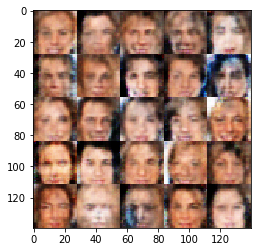

Epoch 1/4... Discr. Loss: 1.1320... Generator Loss: 0.8607
Epoch 1/4... Discr. Loss: 1.3234... Generator Loss: 1.4812
Epoch 1/4... Discr. Loss: 1.1267... Generator Loss: 1.2900
Epoch 1/4... Discr. Loss: 1.8825... Generator Loss: 0.2507
Epoch 1/4... Discr. Loss: 1.2710... Generator Loss: 0.6723
Epoch 1/4... Discr. Loss: 1.3363... Generator Loss: 0.9215
Epoch 1/4... Discr. Loss: 1.2752... Generator Loss: 1.4232
Epoch 1/4... Discr. Loss: 1.3570... Generator Loss: 0.5819
Epoch 1/4... Discr. Loss: 1.2855... Generator Loss: 0.8246
Epoch 1/4... Discr. Loss: 1.4980... Generator Loss: 1.2230


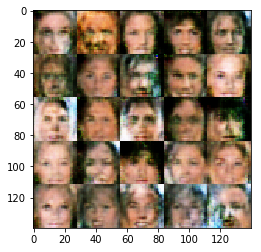

Epoch 1/4... Discr. Loss: 1.1678... Generator Loss: 0.7915
Epoch 1/4... Discr. Loss: 1.3483... Generator Loss: 0.9438
Epoch 1/4... Discr. Loss: 1.2554... Generator Loss: 0.7826
Epoch 1/4... Discr. Loss: 1.1276... Generator Loss: 1.0597
Epoch 1/4... Discr. Loss: 1.2701... Generator Loss: 0.6900
Epoch 1/4... Discr. Loss: 1.2998... Generator Loss: 0.7988
Epoch 1/4... Discr. Loss: 1.1474... Generator Loss: 1.1118
Epoch 1/4... Discr. Loss: 1.2742... Generator Loss: 0.9648
Epoch 1/4... Discr. Loss: 1.5175... Generator Loss: 1.3140
Epoch 1/4... Discr. Loss: 1.3129... Generator Loss: 0.8016


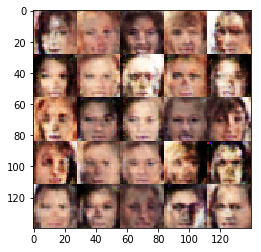

Epoch 1/4... Discr. Loss: 1.2381... Generator Loss: 0.9041
Epoch 1/4... Discr. Loss: 1.2826... Generator Loss: 0.7959
Epoch 1/4... Discr. Loss: 1.4115... Generator Loss: 0.8032
Epoch 1/4... Discr. Loss: 1.2868... Generator Loss: 0.7440
Epoch 1/4... Discr. Loss: 1.5652... Generator Loss: 0.3948
Epoch 1/4... Discr. Loss: 2.1205... Generator Loss: 2.3628
Epoch 1/4... Discr. Loss: 1.2898... Generator Loss: 0.8630
Epoch 1/4... Discr. Loss: 1.3396... Generator Loss: 0.7639
Epoch 1/4... Discr. Loss: 1.2684... Generator Loss: 0.7573
Epoch 1/4... Discr. Loss: 1.2590... Generator Loss: 1.0792


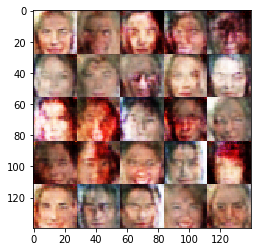

Epoch 1/4... Discr. Loss: 1.3851... Generator Loss: 0.8283
Epoch 1/4... Discr. Loss: 1.4603... Generator Loss: 1.2924
Epoch 1/4... Discr. Loss: 1.3389... Generator Loss: 0.7574
Epoch 1/4... Discr. Loss: 1.1908... Generator Loss: 1.0441
Epoch 1/4... Discr. Loss: 1.3799... Generator Loss: 0.8368
Epoch 1/4... Discr. Loss: 1.3605... Generator Loss: 0.6889
Epoch 1/4... Discr. Loss: 1.3186... Generator Loss: 0.8171
Epoch 1/4... Discr. Loss: 1.3498... Generator Loss: 0.7828
Epoch 1/4... Discr. Loss: 1.2354... Generator Loss: 0.8746
Epoch 1/4... Discr. Loss: 1.3129... Generator Loss: 0.8421


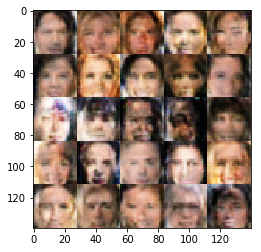

Epoch 1/4... Discr. Loss: 1.4376... Generator Loss: 0.8097
Epoch 1/4... Discr. Loss: 1.4001... Generator Loss: 0.8429
Epoch 1/4... Discr. Loss: 1.2305... Generator Loss: 0.8107
Epoch 1/4... Discr. Loss: 1.3119... Generator Loss: 0.8265
Epoch 1/4... Discr. Loss: 1.2808... Generator Loss: 0.6492
Epoch 1/4... Discr. Loss: 1.2341... Generator Loss: 0.8103
Epoch 1/4... Discr. Loss: 1.3689... Generator Loss: 0.8071
Epoch 1/4... Discr. Loss: 1.1183... Generator Loss: 0.8175
Epoch 1/4... Discr. Loss: 1.4106... Generator Loss: 0.8491
Epoch 1/4... Discr. Loss: 1.2631... Generator Loss: 0.8951


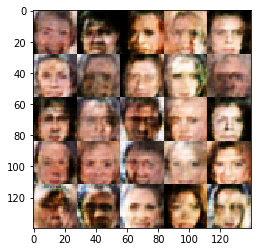

Epoch 1/4... Discr. Loss: 1.3213... Generator Loss: 0.8325
Epoch 1/4... Discr. Loss: 1.2472... Generator Loss: 0.8497
Epoch 1/4... Discr. Loss: 1.3008... Generator Loss: 0.9393
Epoch 1/4... Discr. Loss: 1.3460... Generator Loss: 0.7050
Epoch 1/4... Discr. Loss: 1.2092... Generator Loss: 0.7904
Epoch 1/4... Discr. Loss: 1.2811... Generator Loss: 0.7181
Epoch 1/4... Discr. Loss: 1.2229... Generator Loss: 0.9596
Epoch 1/4... Discr. Loss: 1.3491... Generator Loss: 0.7704
Epoch 1/4... Discr. Loss: 1.2025... Generator Loss: 0.7812
Epoch 1/4... Discr. Loss: 1.2216... Generator Loss: 1.0062


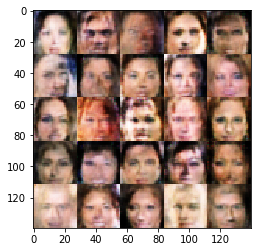

Epoch 1/4... Discr. Loss: 1.2536... Generator Loss: 0.7760
Epoch 1/4... Discr. Loss: 1.2306... Generator Loss: 0.8059
Epoch 1/4... Discr. Loss: 1.3249... Generator Loss: 0.7944
Epoch 1/4... Discr. Loss: 1.2530... Generator Loss: 1.1936
Epoch 1/4... Discr. Loss: 1.1615... Generator Loss: 0.7553
Epoch 1/4... Discr. Loss: 1.2793... Generator Loss: 0.7701
Epoch 1/4... Discr. Loss: 1.3160... Generator Loss: 0.9444
Epoch 1/4... Discr. Loss: 1.3050... Generator Loss: 0.7440
Epoch 1/4... Discr. Loss: 1.2799... Generator Loss: 1.0284
Epoch 1/4... Discr. Loss: 1.4187... Generator Loss: 0.7707


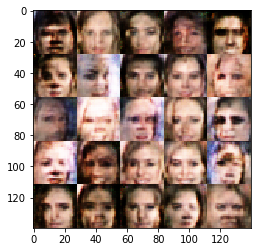

Epoch 1/4... Discr. Loss: 1.1639... Generator Loss: 1.0195
Epoch 1/4... Discr. Loss: 1.3195... Generator Loss: 0.9502
Epoch 1/4... Discr. Loss: 1.3844... Generator Loss: 0.7661
Epoch 1/4... Discr. Loss: 1.2796... Generator Loss: 0.8958
Epoch 1/4... Discr. Loss: 1.3169... Generator Loss: 1.0298
Epoch 1/4... Discr. Loss: 1.3059... Generator Loss: 0.9141
Epoch 1/4... Discr. Loss: 1.2810... Generator Loss: 0.7369
Epoch 1/4... Discr. Loss: 1.2037... Generator Loss: 0.9846
Epoch 2/4... Discr. Loss: 1.1482... Generator Loss: 1.0038
Epoch 2/4... Discr. Loss: 1.3175... Generator Loss: 0.8149


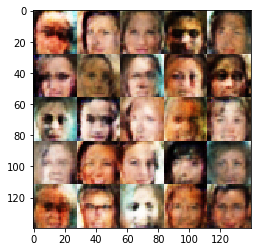

Epoch 2/4... Discr. Loss: 1.3066... Generator Loss: 0.6752
Epoch 2/4... Discr. Loss: 1.2342... Generator Loss: 1.2057
Epoch 2/4... Discr. Loss: 1.4702... Generator Loss: 0.6150
Epoch 2/4... Discr. Loss: 1.2541... Generator Loss: 0.8530
Epoch 2/4... Discr. Loss: 1.3766... Generator Loss: 0.7835
Epoch 2/4... Discr. Loss: 1.4147... Generator Loss: 0.7699
Epoch 2/4... Discr. Loss: 1.3600... Generator Loss: 0.7014
Epoch 2/4... Discr. Loss: 1.3671... Generator Loss: 0.7228
Epoch 2/4... Discr. Loss: 1.2162... Generator Loss: 0.9670
Epoch 2/4... Discr. Loss: 1.3627... Generator Loss: 0.7202


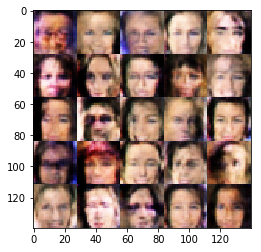

Epoch 2/4... Discr. Loss: 1.5052... Generator Loss: 0.6297
Epoch 2/4... Discr. Loss: 1.2911... Generator Loss: 0.7260
Epoch 2/4... Discr. Loss: 1.3694... Generator Loss: 0.8142
Epoch 2/4... Discr. Loss: 1.3732... Generator Loss: 0.9030
Epoch 2/4... Discr. Loss: 1.3546... Generator Loss: 0.8526
Epoch 2/4... Discr. Loss: 1.3970... Generator Loss: 0.7535
Epoch 2/4... Discr. Loss: 1.2842... Generator Loss: 0.8357
Epoch 2/4... Discr. Loss: 1.3386... Generator Loss: 0.8776
Epoch 2/4... Discr. Loss: 1.3373... Generator Loss: 0.9240
Epoch 2/4... Discr. Loss: 1.3898... Generator Loss: 0.6506


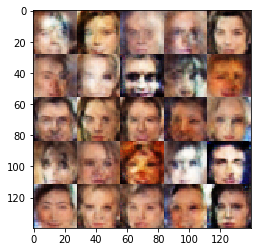

Epoch 2/4... Discr. Loss: 1.3004... Generator Loss: 0.9466
Epoch 2/4... Discr. Loss: 1.3889... Generator Loss: 0.8248
Epoch 2/4... Discr. Loss: 1.2313... Generator Loss: 0.8326
Epoch 2/4... Discr. Loss: 1.2634... Generator Loss: 0.8888
Epoch 2/4... Discr. Loss: 1.3606... Generator Loss: 0.7618
Epoch 2/4... Discr. Loss: 1.3003... Generator Loss: 0.6367
Epoch 2/4... Discr. Loss: 1.3933... Generator Loss: 0.6540
Epoch 2/4... Discr. Loss: 1.4117... Generator Loss: 0.7607
Epoch 2/4... Discr. Loss: 1.2853... Generator Loss: 0.6371
Epoch 2/4... Discr. Loss: 1.4489... Generator Loss: 0.6337


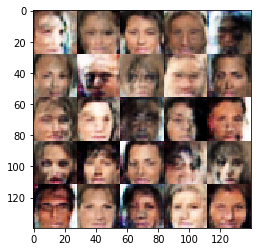

Epoch 2/4... Discr. Loss: 1.2954... Generator Loss: 0.8313
Epoch 2/4... Discr. Loss: 1.2619... Generator Loss: 0.9329
Epoch 2/4... Discr. Loss: 1.3507... Generator Loss: 0.6992
Epoch 2/4... Discr. Loss: 1.3275... Generator Loss: 0.6674
Epoch 2/4... Discr. Loss: 1.3639... Generator Loss: 0.7314
Epoch 2/4... Discr. Loss: 1.4007... Generator Loss: 0.9003
Epoch 2/4... Discr. Loss: 1.3355... Generator Loss: 0.7392
Epoch 2/4... Discr. Loss: 1.2316... Generator Loss: 0.8618
Epoch 2/4... Discr. Loss: 1.2958... Generator Loss: 0.7526
Epoch 2/4... Discr. Loss: 1.3701... Generator Loss: 0.6326


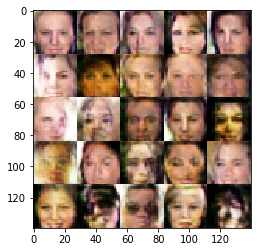

Epoch 2/4... Discr. Loss: 1.3860... Generator Loss: 0.8262
Epoch 2/4... Discr. Loss: 1.3737... Generator Loss: 0.5927
Epoch 2/4... Discr. Loss: 1.2718... Generator Loss: 0.8801
Epoch 2/4... Discr. Loss: 1.3337... Generator Loss: 0.8897
Epoch 2/4... Discr. Loss: 1.3970... Generator Loss: 0.6501
Epoch 2/4... Discr. Loss: 1.3866... Generator Loss: 0.9930
Epoch 2/4... Discr. Loss: 1.4922... Generator Loss: 0.6215
Epoch 2/4... Discr. Loss: 1.3427... Generator Loss: 0.6695
Epoch 2/4... Discr. Loss: 1.3281... Generator Loss: 0.8096
Epoch 2/4... Discr. Loss: 1.2836... Generator Loss: 0.8465


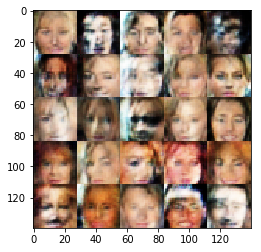

Epoch 2/4... Discr. Loss: 1.3538... Generator Loss: 0.6486
Epoch 2/4... Discr. Loss: 1.4329... Generator Loss: 0.8152
Epoch 2/4... Discr. Loss: 1.4491... Generator Loss: 0.7308
Epoch 2/4... Discr. Loss: 1.3025... Generator Loss: 0.5970
Epoch 2/4... Discr. Loss: 1.3239... Generator Loss: 0.7639
Epoch 2/4... Discr. Loss: 1.3738... Generator Loss: 0.6493
Epoch 2/4... Discr. Loss: 1.2682... Generator Loss: 0.8948
Epoch 2/4... Discr. Loss: 1.3812... Generator Loss: 0.7253
Epoch 2/4... Discr. Loss: 1.2791... Generator Loss: 0.8226
Epoch 2/4... Discr. Loss: 1.3854... Generator Loss: 0.7431


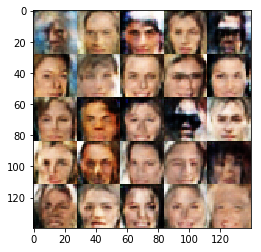

Epoch 2/4... Discr. Loss: 1.2763... Generator Loss: 0.8953
Epoch 2/4... Discr. Loss: 1.2375... Generator Loss: 0.7547
Epoch 2/4... Discr. Loss: 1.3341... Generator Loss: 0.7752
Epoch 2/4... Discr. Loss: 1.2769... Generator Loss: 0.9288
Epoch 2/4... Discr. Loss: 1.3356... Generator Loss: 0.7023
Epoch 2/4... Discr. Loss: 1.3528... Generator Loss: 0.7868
Epoch 2/4... Discr. Loss: 1.3938... Generator Loss: 0.6647
Epoch 2/4... Discr. Loss: 1.3083... Generator Loss: 0.7513
Epoch 2/4... Discr. Loss: 1.3400... Generator Loss: 0.7025
Epoch 2/4... Discr. Loss: 1.3278... Generator Loss: 0.7314


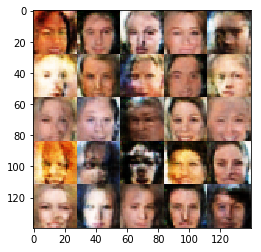

Epoch 2/4... Discr. Loss: 1.2134... Generator Loss: 0.8649
Epoch 2/4... Discr. Loss: 1.3305... Generator Loss: 0.8693
Epoch 2/4... Discr. Loss: 1.3055... Generator Loss: 0.6730
Epoch 2/4... Discr. Loss: 1.2709... Generator Loss: 0.8827
Epoch 2/4... Discr. Loss: 1.4106... Generator Loss: 0.7154
Epoch 2/4... Discr. Loss: 1.2777... Generator Loss: 0.9007
Epoch 2/4... Discr. Loss: 1.4320... Generator Loss: 0.8605
Epoch 2/4... Discr. Loss: 1.2725... Generator Loss: 0.9444
Epoch 2/4... Discr. Loss: 1.3167... Generator Loss: 0.8677
Epoch 2/4... Discr. Loss: 1.3303... Generator Loss: 0.7084


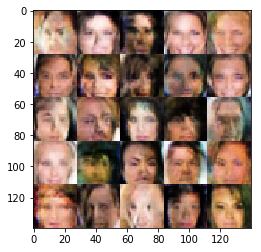

Epoch 2/4... Discr. Loss: 1.3790... Generator Loss: 0.6934
Epoch 2/4... Discr. Loss: 1.2638... Generator Loss: 0.8391
Epoch 2/4... Discr. Loss: 1.2557... Generator Loss: 0.8623
Epoch 2/4... Discr. Loss: 1.3663... Generator Loss: 0.7418
Epoch 2/4... Discr. Loss: 1.3699... Generator Loss: 0.7966
Epoch 2/4... Discr. Loss: 1.3860... Generator Loss: 0.8299
Epoch 2/4... Discr. Loss: 1.3759... Generator Loss: 0.6935
Epoch 2/4... Discr. Loss: 1.2097... Generator Loss: 0.9634
Epoch 2/4... Discr. Loss: 1.2397... Generator Loss: 0.9098
Epoch 2/4... Discr. Loss: 1.3760... Generator Loss: 0.5529


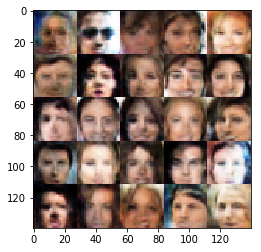

Epoch 2/4... Discr. Loss: 1.2900... Generator Loss: 0.8474
Epoch 2/4... Discr. Loss: 1.1791... Generator Loss: 0.9201
Epoch 2/4... Discr. Loss: 1.3410... Generator Loss: 0.8113
Epoch 2/4... Discr. Loss: 1.4571... Generator Loss: 0.7210
Epoch 2/4... Discr. Loss: 1.3358... Generator Loss: 0.7885
Epoch 2/4... Discr. Loss: 1.2941... Generator Loss: 0.8702
Epoch 2/4... Discr. Loss: 1.3771... Generator Loss: 0.9938
Epoch 2/4... Discr. Loss: 1.3113... Generator Loss: 0.7039
Epoch 2/4... Discr. Loss: 1.2757... Generator Loss: 0.6601
Epoch 2/4... Discr. Loss: 1.3208... Generator Loss: 0.7493


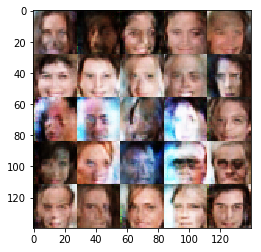

Epoch 2/4... Discr. Loss: 1.3332... Generator Loss: 0.8272
Epoch 2/4... Discr. Loss: 1.2506... Generator Loss: 0.7397
Epoch 2/4... Discr. Loss: 1.4021... Generator Loss: 0.8783
Epoch 2/4... Discr. Loss: 1.3189... Generator Loss: 0.8758
Epoch 2/4... Discr. Loss: 1.3378... Generator Loss: 1.1610
Epoch 2/4... Discr. Loss: 1.3706... Generator Loss: 1.0598
Epoch 2/4... Discr. Loss: 1.4139... Generator Loss: 0.7623
Epoch 2/4... Discr. Loss: 1.3119... Generator Loss: 0.9224
Epoch 2/4... Discr. Loss: 1.2524... Generator Loss: 0.8689
Epoch 2/4... Discr. Loss: 1.2357... Generator Loss: 0.8915


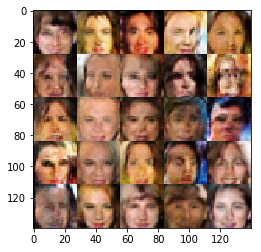

Epoch 2/4... Discr. Loss: 1.1683... Generator Loss: 0.8536
Epoch 2/4... Discr. Loss: 1.3904... Generator Loss: 0.6260
Epoch 2/4... Discr. Loss: 1.3169... Generator Loss: 0.7165
Epoch 2/4... Discr. Loss: 1.3146... Generator Loss: 0.7666
Epoch 2/4... Discr. Loss: 1.2995... Generator Loss: 0.7499
Epoch 2/4... Discr. Loss: 1.3342... Generator Loss: 0.7102
Epoch 2/4... Discr. Loss: 1.2990... Generator Loss: 0.8790
Epoch 2/4... Discr. Loss: 1.2835... Generator Loss: 0.8734
Epoch 2/4... Discr. Loss: 1.3531... Generator Loss: 0.7499
Epoch 2/4... Discr. Loss: 1.3179... Generator Loss: 0.6497


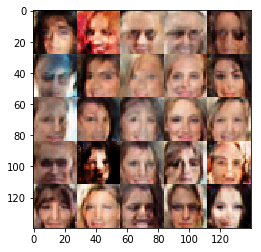

Epoch 2/4... Discr. Loss: 1.2817... Generator Loss: 0.9568
Epoch 2/4... Discr. Loss: 1.3526... Generator Loss: 0.7833
Epoch 2/4... Discr. Loss: 1.3030... Generator Loss: 0.8051
Epoch 2/4... Discr. Loss: 1.2483... Generator Loss: 0.8191
Epoch 2/4... Discr. Loss: 1.3976... Generator Loss: 0.8595
Epoch 2/4... Discr. Loss: 1.3106... Generator Loss: 0.7581
Epoch 2/4... Discr. Loss: 1.3513... Generator Loss: 0.8012
Epoch 2/4... Discr. Loss: 1.3310... Generator Loss: 0.7415
Epoch 2/4... Discr. Loss: 1.4081... Generator Loss: 0.6090
Epoch 2/4... Discr. Loss: 1.3811... Generator Loss: 0.6933


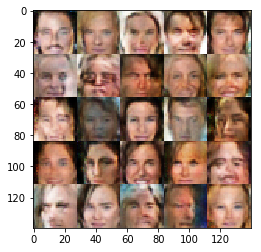

Epoch 2/4... Discr. Loss: 1.3234... Generator Loss: 0.7426
Epoch 2/4... Discr. Loss: 1.4016... Generator Loss: 0.7050
Epoch 2/4... Discr. Loss: 1.3523... Generator Loss: 0.7186
Epoch 2/4... Discr. Loss: 1.2934... Generator Loss: 0.8507
Epoch 2/4... Discr. Loss: 1.3102... Generator Loss: 0.8296
Epoch 2/4... Discr. Loss: 1.3912... Generator Loss: 0.7091
Epoch 2/4... Discr. Loss: 1.2966... Generator Loss: 0.9258
Epoch 2/4... Discr. Loss: 1.4018... Generator Loss: 0.8585
Epoch 2/4... Discr. Loss: 1.3453... Generator Loss: 0.8100
Epoch 2/4... Discr. Loss: 1.2366... Generator Loss: 0.7634


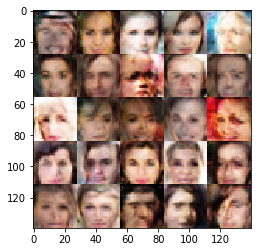

Epoch 2/4... Discr. Loss: 1.2997... Generator Loss: 0.8261
Epoch 2/4... Discr. Loss: 1.3871... Generator Loss: 0.6050
Epoch 2/4... Discr. Loss: 1.3457... Generator Loss: 0.7957
Epoch 2/4... Discr. Loss: 1.4891... Generator Loss: 0.8670
Epoch 2/4... Discr. Loss: 1.3770... Generator Loss: 0.7080
Epoch 2/4... Discr. Loss: 1.3035... Generator Loss: 0.7621
Epoch 2/4... Discr. Loss: 1.2838... Generator Loss: 0.8793
Epoch 2/4... Discr. Loss: 1.2944... Generator Loss: 0.7861
Epoch 2/4... Discr. Loss: 1.4038... Generator Loss: 0.7069
Epoch 2/4... Discr. Loss: 1.3646... Generator Loss: 0.8811


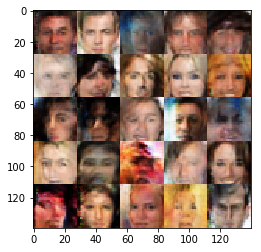

Epoch 2/4... Discr. Loss: 1.3978... Generator Loss: 0.8019
Epoch 2/4... Discr. Loss: 1.3128... Generator Loss: 0.7530
Epoch 2/4... Discr. Loss: 1.2725... Generator Loss: 0.8292
Epoch 2/4... Discr. Loss: 1.3187... Generator Loss: 0.6906
Epoch 2/4... Discr. Loss: 1.3778... Generator Loss: 0.8684
Epoch 2/4... Discr. Loss: 1.3087... Generator Loss: 0.7039
Epoch 3/4... Discr. Loss: 1.3385... Generator Loss: 0.8554
Epoch 3/4... Discr. Loss: 1.3245... Generator Loss: 0.7098
Epoch 3/4... Discr. Loss: 1.3458... Generator Loss: 0.6792
Epoch 3/4... Discr. Loss: 1.3178... Generator Loss: 0.7283


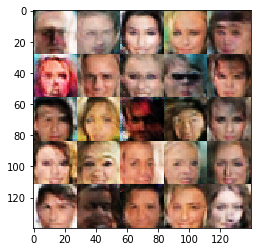

Epoch 3/4... Discr. Loss: 1.3032... Generator Loss: 0.7683
Epoch 3/4... Discr. Loss: 1.2922... Generator Loss: 0.7490
Epoch 3/4... Discr. Loss: 1.3616... Generator Loss: 0.7833
Epoch 3/4... Discr. Loss: 1.2941... Generator Loss: 0.8938
Epoch 3/4... Discr. Loss: 1.2694... Generator Loss: 0.7992
Epoch 3/4... Discr. Loss: 1.1949... Generator Loss: 0.8455
Epoch 3/4... Discr. Loss: 1.3401... Generator Loss: 0.7426
Epoch 3/4... Discr. Loss: 1.3630... Generator Loss: 0.8211
Epoch 3/4... Discr. Loss: 1.3488... Generator Loss: 0.7613
Epoch 3/4... Discr. Loss: 1.2876... Generator Loss: 0.8700


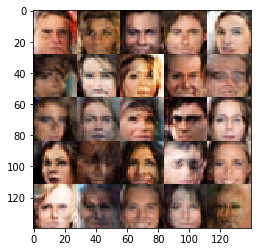

Epoch 3/4... Discr. Loss: 1.2929... Generator Loss: 0.6784
Epoch 3/4... Discr. Loss: 1.3101... Generator Loss: 0.8714
Epoch 3/4... Discr. Loss: 1.3706... Generator Loss: 0.6922
Epoch 3/4... Discr. Loss: 1.3166... Generator Loss: 0.7771
Epoch 3/4... Discr. Loss: 1.4003... Generator Loss: 0.7557
Epoch 3/4... Discr. Loss: 1.3574... Generator Loss: 0.6758
Epoch 3/4... Discr. Loss: 1.3883... Generator Loss: 0.6513
Epoch 3/4... Discr. Loss: 1.3213... Generator Loss: 0.7387
Epoch 3/4... Discr. Loss: 1.3482... Generator Loss: 0.6829
Epoch 3/4... Discr. Loss: 1.2127... Generator Loss: 0.8559


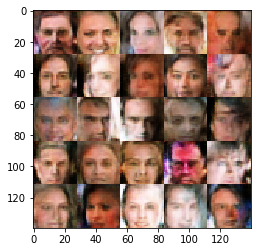

Epoch 3/4... Discr. Loss: 1.4054... Generator Loss: 0.6841
Epoch 3/4... Discr. Loss: 1.2182... Generator Loss: 1.0084
Epoch 3/4... Discr. Loss: 1.2845... Generator Loss: 0.7294
Epoch 3/4... Discr. Loss: 1.4660... Generator Loss: 0.7432
Epoch 3/4... Discr. Loss: 1.2247... Generator Loss: 0.7555
Epoch 3/4... Discr. Loss: 1.3038... Generator Loss: 0.7757
Epoch 3/4... Discr. Loss: 1.3701... Generator Loss: 0.7819
Epoch 3/4... Discr. Loss: 1.3529... Generator Loss: 0.7411
Epoch 3/4... Discr. Loss: 1.3656... Generator Loss: 0.7464
Epoch 3/4... Discr. Loss: 1.2489... Generator Loss: 0.9109


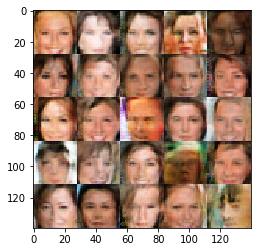

Epoch 3/4... Discr. Loss: 1.4271... Generator Loss: 0.8268
Epoch 3/4... Discr. Loss: 1.3361... Generator Loss: 0.7754
Epoch 3/4... Discr. Loss: 1.3249... Generator Loss: 0.7955
Epoch 3/4... Discr. Loss: 1.3638... Generator Loss: 0.6518
Epoch 3/4... Discr. Loss: 1.3577... Generator Loss: 0.7159
Epoch 3/4... Discr. Loss: 1.2768... Generator Loss: 0.7887
Epoch 3/4... Discr. Loss: 1.3159... Generator Loss: 0.7353
Epoch 3/4... Discr. Loss: 1.3355... Generator Loss: 0.8861
Epoch 3/4... Discr. Loss: 1.3313... Generator Loss: 0.7837
Epoch 3/4... Discr. Loss: 1.3537... Generator Loss: 0.7909


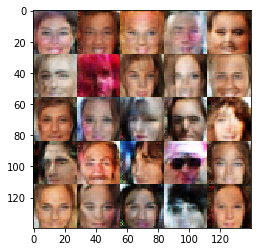

Epoch 3/4... Discr. Loss: 1.3674... Generator Loss: 0.8444
Epoch 3/4... Discr. Loss: 1.3541... Generator Loss: 0.7715
Epoch 3/4... Discr. Loss: 1.3205... Generator Loss: 0.8258
Epoch 3/4... Discr. Loss: 1.3397... Generator Loss: 0.6620
Epoch 3/4... Discr. Loss: 1.3667... Generator Loss: 0.5976
Epoch 3/4... Discr. Loss: 1.2992... Generator Loss: 0.9184
Epoch 3/4... Discr. Loss: 1.3246... Generator Loss: 0.7803
Epoch 3/4... Discr. Loss: 1.2486... Generator Loss: 0.7964
Epoch 3/4... Discr. Loss: 1.2850... Generator Loss: 0.7214
Epoch 3/4... Discr. Loss: 1.3035... Generator Loss: 0.7941


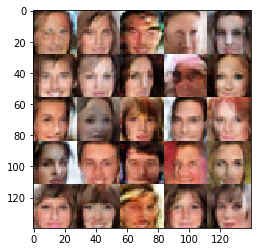

Epoch 3/4... Discr. Loss: 1.2829... Generator Loss: 0.8492
Epoch 3/4... Discr. Loss: 1.3231... Generator Loss: 0.7687
Epoch 3/4... Discr. Loss: 1.3068... Generator Loss: 0.8348
Epoch 3/4... Discr. Loss: 1.3486... Generator Loss: 0.7846
Epoch 3/4... Discr. Loss: 1.3399... Generator Loss: 0.7428
Epoch 3/4... Discr. Loss: 1.3150... Generator Loss: 0.9063
Epoch 3/4... Discr. Loss: 1.3100... Generator Loss: 0.7783
Epoch 3/4... Discr. Loss: 1.2699... Generator Loss: 0.7987
Epoch 3/4... Discr. Loss: 1.3146... Generator Loss: 0.7655
Epoch 3/4... Discr. Loss: 1.2338... Generator Loss: 0.7987


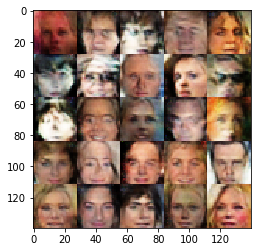

Epoch 3/4... Discr. Loss: 1.3802... Generator Loss: 0.7972
Epoch 3/4... Discr. Loss: 1.3527... Generator Loss: 0.7452
Epoch 3/4... Discr. Loss: 1.4093... Generator Loss: 0.8814
Epoch 3/4... Discr. Loss: 1.3026... Generator Loss: 0.7405
Epoch 3/4... Discr. Loss: 1.3509... Generator Loss: 0.6899
Epoch 3/4... Discr. Loss: 1.3153... Generator Loss: 0.7328
Epoch 3/4... Discr. Loss: 1.2937... Generator Loss: 0.7249
Epoch 3/4... Discr. Loss: 1.3407... Generator Loss: 0.7077
Epoch 3/4... Discr. Loss: 1.3606... Generator Loss: 0.7258
Epoch 3/4... Discr. Loss: 1.2977... Generator Loss: 0.8189


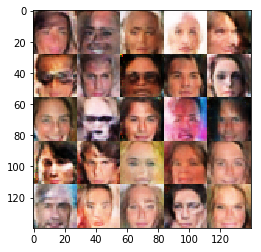

Epoch 3/4... Discr. Loss: 1.3320... Generator Loss: 0.7244
Epoch 3/4... Discr. Loss: 1.3533... Generator Loss: 0.7247
Epoch 3/4... Discr. Loss: 1.3278... Generator Loss: 0.6451
Epoch 3/4... Discr. Loss: 1.3220... Generator Loss: 0.7570
Epoch 3/4... Discr. Loss: 1.2958... Generator Loss: 0.8833
Epoch 3/4... Discr. Loss: 1.3079... Generator Loss: 0.8097
Epoch 3/4... Discr. Loss: 1.3873... Generator Loss: 0.6735
Epoch 3/4... Discr. Loss: 1.4032... Generator Loss: 0.7097
Epoch 3/4... Discr. Loss: 1.3837... Generator Loss: 0.9102
Epoch 3/4... Discr. Loss: 1.4594... Generator Loss: 0.7415


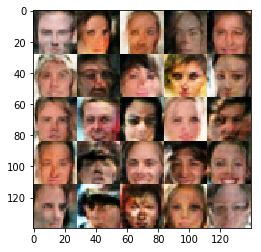

Epoch 3/4... Discr. Loss: 1.4187... Generator Loss: 1.2023
Epoch 3/4... Discr. Loss: 1.4200... Generator Loss: 0.6834
Epoch 3/4... Discr. Loss: 1.3390... Generator Loss: 0.8368
Epoch 3/4... Discr. Loss: 1.3512... Generator Loss: 0.7371
Epoch 3/4... Discr. Loss: 1.2738... Generator Loss: 0.9423
Epoch 3/4... Discr. Loss: 1.3516... Generator Loss: 0.7296
Epoch 3/4... Discr. Loss: 1.3532... Generator Loss: 0.7015
Epoch 3/4... Discr. Loss: 1.2937... Generator Loss: 0.7596
Epoch 3/4... Discr. Loss: 1.3589... Generator Loss: 0.7679
Epoch 3/4... Discr. Loss: 1.2772... Generator Loss: 0.8248


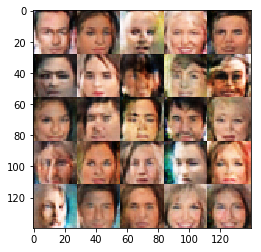

Epoch 3/4... Discr. Loss: 1.2145... Generator Loss: 0.8415
Epoch 3/4... Discr. Loss: 1.2953... Generator Loss: 0.8707
Epoch 3/4... Discr. Loss: 1.2993... Generator Loss: 0.7913
Epoch 3/4... Discr. Loss: 1.2729... Generator Loss: 0.8560
Epoch 3/4... Discr. Loss: 1.2784... Generator Loss: 1.0393
Epoch 3/4... Discr. Loss: 1.3549... Generator Loss: 0.7645
Epoch 3/4... Discr. Loss: 1.2300... Generator Loss: 0.7553
Epoch 3/4... Discr. Loss: 1.3146... Generator Loss: 0.7588
Epoch 3/4... Discr. Loss: 1.3190... Generator Loss: 0.8801
Epoch 3/4... Discr. Loss: 1.3267... Generator Loss: 0.7215


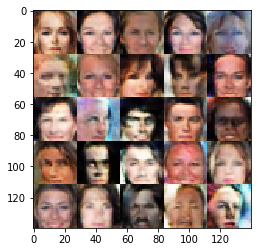

Epoch 3/4... Discr. Loss: 1.2946... Generator Loss: 0.7748
Epoch 3/4... Discr. Loss: 1.2459... Generator Loss: 0.7849
Epoch 3/4... Discr. Loss: 1.3518... Generator Loss: 0.6390
Epoch 3/4... Discr. Loss: 1.4095... Generator Loss: 0.7675
Epoch 3/4... Discr. Loss: 1.3089... Generator Loss: 0.6536
Epoch 3/4... Discr. Loss: 1.3565... Generator Loss: 0.8343
Epoch 3/4... Discr. Loss: 1.3311... Generator Loss: 0.7970
Epoch 3/4... Discr. Loss: 1.2308... Generator Loss: 0.6978
Epoch 3/4... Discr. Loss: 1.3040... Generator Loss: 0.7434
Epoch 3/4... Discr. Loss: 1.3541... Generator Loss: 0.8221


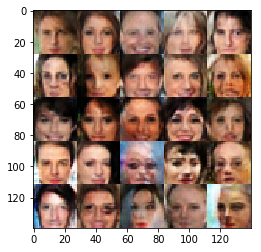

Epoch 3/4... Discr. Loss: 1.4125... Generator Loss: 0.6997
Epoch 3/4... Discr. Loss: 1.3188... Generator Loss: 0.7719
Epoch 3/4... Discr. Loss: 1.2410... Generator Loss: 0.8647
Epoch 3/4... Discr. Loss: 1.3081... Generator Loss: 0.7338
Epoch 3/4... Discr. Loss: 1.3784... Generator Loss: 0.6601
Epoch 3/4... Discr. Loss: 1.3162... Generator Loss: 0.8051
Epoch 3/4... Discr. Loss: 1.3278... Generator Loss: 0.7563
Epoch 3/4... Discr. Loss: 1.4499... Generator Loss: 0.5391
Epoch 3/4... Discr. Loss: 1.3563... Generator Loss: 0.7053
Epoch 3/4... Discr. Loss: 1.2402... Generator Loss: 0.7935


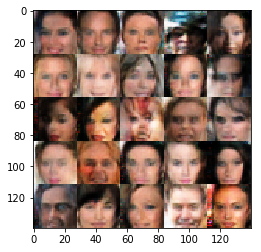

Epoch 3/4... Discr. Loss: 1.3407... Generator Loss: 0.7343
Epoch 3/4... Discr. Loss: 1.3934... Generator Loss: 0.6774
Epoch 3/4... Discr. Loss: 1.3758... Generator Loss: 0.6443
Epoch 3/4... Discr. Loss: 1.3455... Generator Loss: 0.9150
Epoch 3/4... Discr. Loss: 1.2919... Generator Loss: 0.8065
Epoch 3/4... Discr. Loss: 1.3017... Generator Loss: 0.7972
Epoch 3/4... Discr. Loss: 1.4182... Generator Loss: 0.6701
Epoch 3/4... Discr. Loss: 1.3418... Generator Loss: 0.7404
Epoch 3/4... Discr. Loss: 1.3268... Generator Loss: 0.8294
Epoch 3/4... Discr. Loss: 1.2586... Generator Loss: 0.8612


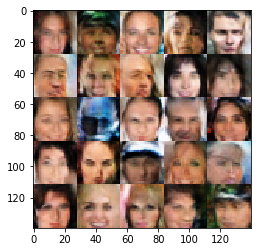

Epoch 3/4... Discr. Loss: 1.2685... Generator Loss: 0.8584
Epoch 3/4... Discr. Loss: 1.3114... Generator Loss: 0.9446
Epoch 3/4... Discr. Loss: 1.2792... Generator Loss: 0.8222
Epoch 3/4... Discr. Loss: 1.1706... Generator Loss: 0.7420
Epoch 3/4... Discr. Loss: 1.3035... Generator Loss: 0.7405
Epoch 3/4... Discr. Loss: 1.3427... Generator Loss: 0.6390
Epoch 3/4... Discr. Loss: 1.2988... Generator Loss: 0.7038
Epoch 3/4... Discr. Loss: 1.2972... Generator Loss: 0.9566
Epoch 3/4... Discr. Loss: 1.3837... Generator Loss: 0.8149
Epoch 3/4... Discr. Loss: 1.3285... Generator Loss: 0.8248


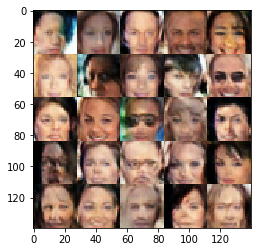

Epoch 3/4... Discr. Loss: 1.3888... Generator Loss: 0.6207
Epoch 3/4... Discr. Loss: 1.4339... Generator Loss: 0.7674
Epoch 3/4... Discr. Loss: 1.4297... Generator Loss: 0.6768
Epoch 3/4... Discr. Loss: 1.3435... Generator Loss: 0.6822
Epoch 3/4... Discr. Loss: 1.3513... Generator Loss: 0.7515
Epoch 3/4... Discr. Loss: 1.3081... Generator Loss: 0.8401
Epoch 3/4... Discr. Loss: 1.2292... Generator Loss: 0.8223
Epoch 3/4... Discr. Loss: 1.4141... Generator Loss: 0.8083
Epoch 3/4... Discr. Loss: 1.3296... Generator Loss: 0.7276
Epoch 3/4... Discr. Loss: 1.2566... Generator Loss: 0.8191


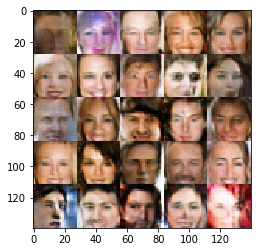

Epoch 3/4... Discr. Loss: 1.3804... Generator Loss: 0.7136
Epoch 3/4... Discr. Loss: 1.2532... Generator Loss: 0.7876
Epoch 3/4... Discr. Loss: 1.2541... Generator Loss: 0.8178
Epoch 3/4... Discr. Loss: 1.3627... Generator Loss: 0.7241
Epoch 4/4... Discr. Loss: 1.3373... Generator Loss: 0.7037
Epoch 4/4... Discr. Loss: 1.3920... Generator Loss: 0.6183
Epoch 4/4... Discr. Loss: 1.2816... Generator Loss: 0.7673
Epoch 4/4... Discr. Loss: 1.2762... Generator Loss: 0.8757
Epoch 4/4... Discr. Loss: 1.3120... Generator Loss: 0.7941
Epoch 4/4... Discr. Loss: 1.3685... Generator Loss: 0.7650


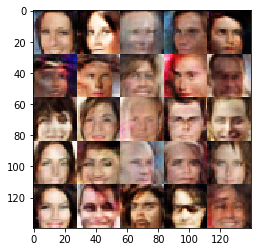

Epoch 4/4... Discr. Loss: 1.3200... Generator Loss: 0.6975
Epoch 4/4... Discr. Loss: 1.3652... Generator Loss: 0.7830
Epoch 4/4... Discr. Loss: 1.2927... Generator Loss: 0.9784
Epoch 4/4... Discr. Loss: 1.3308... Generator Loss: 0.7502
Epoch 4/4... Discr. Loss: 1.3380... Generator Loss: 0.7495
Epoch 4/4... Discr. Loss: 1.4098... Generator Loss: 0.7695
Epoch 4/4... Discr. Loss: 1.3245... Generator Loss: 0.9176
Epoch 4/4... Discr. Loss: 1.3284... Generator Loss: 0.6640
Epoch 4/4... Discr. Loss: 1.3653... Generator Loss: 0.6884
Epoch 4/4... Discr. Loss: 1.3754... Generator Loss: 0.6626


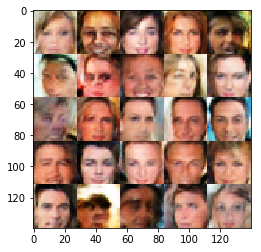

Epoch 4/4... Discr. Loss: 1.3153... Generator Loss: 0.7956
Epoch 4/4... Discr. Loss: 1.3312... Generator Loss: 0.7818
Epoch 4/4... Discr. Loss: 1.2774... Generator Loss: 0.9543
Epoch 4/4... Discr. Loss: 1.4058... Generator Loss: 0.5974
Epoch 4/4... Discr. Loss: 1.4152... Generator Loss: 0.7467
Epoch 4/4... Discr. Loss: 1.3206... Generator Loss: 0.6777
Epoch 4/4... Discr. Loss: 1.4432... Generator Loss: 0.7123
Epoch 4/4... Discr. Loss: 1.3248... Generator Loss: 0.7725
Epoch 4/4... Discr. Loss: 1.3146... Generator Loss: 0.6636
Epoch 4/4... Discr. Loss: 1.3908... Generator Loss: 0.7914


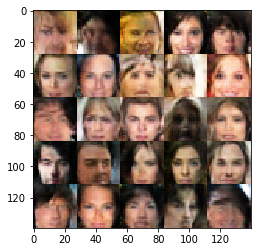

Epoch 4/4... Discr. Loss: 1.2807... Generator Loss: 0.8508
Epoch 4/4... Discr. Loss: 1.3557... Generator Loss: 0.8841
Epoch 4/4... Discr. Loss: 1.2990... Generator Loss: 0.8478
Epoch 4/4... Discr. Loss: 1.3038... Generator Loss: 0.6654
Epoch 4/4... Discr. Loss: 1.3254... Generator Loss: 0.8169
Epoch 4/4... Discr. Loss: 1.2881... Generator Loss: 0.8800
Epoch 4/4... Discr. Loss: 1.3793... Generator Loss: 0.9263
Epoch 4/4... Discr. Loss: 1.3199... Generator Loss: 0.8329
Epoch 4/4... Discr. Loss: 1.4276... Generator Loss: 0.7417
Epoch 4/4... Discr. Loss: 1.3554... Generator Loss: 0.6461


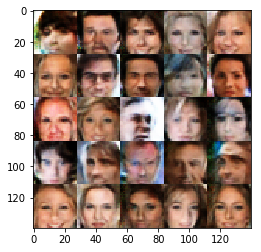

Epoch 4/4... Discr. Loss: 1.3365... Generator Loss: 0.6938
Epoch 4/4... Discr. Loss: 1.2558... Generator Loss: 0.8386
Epoch 4/4... Discr. Loss: 1.3518... Generator Loss: 0.8574
Epoch 4/4... Discr. Loss: 1.3756... Generator Loss: 0.8625
Epoch 4/4... Discr. Loss: 1.2873... Generator Loss: 0.8720
Epoch 4/4... Discr. Loss: 1.3473... Generator Loss: 0.8190
Epoch 4/4... Discr. Loss: 1.2973... Generator Loss: 0.7672
Epoch 4/4... Discr. Loss: 1.3320... Generator Loss: 0.7388
Epoch 4/4... Discr. Loss: 1.3005... Generator Loss: 0.6921
Epoch 4/4... Discr. Loss: 1.2982... Generator Loss: 0.7301


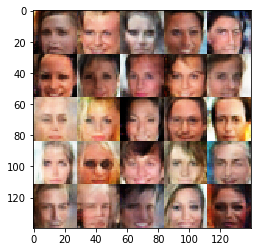

Epoch 4/4... Discr. Loss: 1.3401... Generator Loss: 0.6774
Epoch 4/4... Discr. Loss: 1.3023... Generator Loss: 0.7322
Epoch 4/4... Discr. Loss: 1.3618... Generator Loss: 0.8272
Epoch 4/4... Discr. Loss: 1.3377... Generator Loss: 0.6625
Epoch 4/4... Discr. Loss: 1.3421... Generator Loss: 0.7841
Epoch 4/4... Discr. Loss: 1.4371... Generator Loss: 0.6434
Epoch 4/4... Discr. Loss: 1.3041... Generator Loss: 0.8198
Epoch 4/4... Discr. Loss: 1.3993... Generator Loss: 0.6765
Epoch 4/4... Discr. Loss: 1.2832... Generator Loss: 0.7485
Epoch 4/4... Discr. Loss: 1.2840... Generator Loss: 0.6978


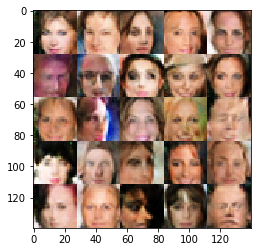

Epoch 4/4... Discr. Loss: 1.3641... Generator Loss: 0.7049
Epoch 4/4... Discr. Loss: 1.3367... Generator Loss: 0.7847
Epoch 4/4... Discr. Loss: 1.3433... Generator Loss: 0.7677
Epoch 4/4... Discr. Loss: 1.2703... Generator Loss: 0.8446
Epoch 4/4... Discr. Loss: 1.3384... Generator Loss: 0.7831
Epoch 4/4... Discr. Loss: 1.3019... Generator Loss: 0.7346
Epoch 4/4... Discr. Loss: 1.3768... Generator Loss: 0.6703
Epoch 4/4... Discr. Loss: 1.2585... Generator Loss: 0.8659
Epoch 4/4... Discr. Loss: 1.3629... Generator Loss: 0.7106
Epoch 4/4... Discr. Loss: 1.3175... Generator Loss: 0.6508


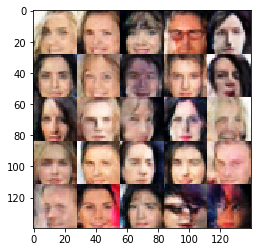

Epoch 4/4... Discr. Loss: 1.2712... Generator Loss: 0.7857
Epoch 4/4... Discr. Loss: 1.3540... Generator Loss: 0.7457
Epoch 4/4... Discr. Loss: 1.3660... Generator Loss: 0.7715
Epoch 4/4... Discr. Loss: 1.3525... Generator Loss: 0.6140
Epoch 4/4... Discr. Loss: 1.3418... Generator Loss: 0.8062
Epoch 4/4... Discr. Loss: 1.3529... Generator Loss: 0.7276
Epoch 4/4... Discr. Loss: 1.3939... Generator Loss: 0.8006
Epoch 4/4... Discr. Loss: 1.3002... Generator Loss: 0.6824
Epoch 4/4... Discr. Loss: 1.4137... Generator Loss: 0.7677
Epoch 4/4... Discr. Loss: 1.2365... Generator Loss: 0.9421


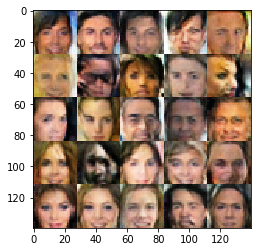

Epoch 4/4... Discr. Loss: 1.4975... Generator Loss: 0.5461
Epoch 4/4... Discr. Loss: 1.3237... Generator Loss: 0.7013
Epoch 4/4... Discr. Loss: 1.5275... Generator Loss: 0.5458
Epoch 4/4... Discr. Loss: 1.2091... Generator Loss: 0.8393
Epoch 4/4... Discr. Loss: 1.4009... Generator Loss: 0.8122
Epoch 4/4... Discr. Loss: 1.2894... Generator Loss: 0.8317
Epoch 4/4... Discr. Loss: 1.2588... Generator Loss: 0.9352
Epoch 4/4... Discr. Loss: 1.3448... Generator Loss: 0.7316
Epoch 4/4... Discr. Loss: 1.3484... Generator Loss: 0.7241
Epoch 4/4... Discr. Loss: 1.2983... Generator Loss: 0.9509


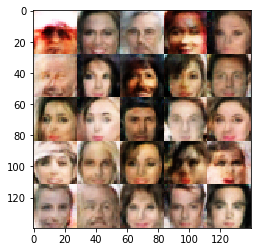

Epoch 4/4... Discr. Loss: 1.3327... Generator Loss: 0.8065
Epoch 4/4... Discr. Loss: 1.2153... Generator Loss: 0.8059
Epoch 4/4... Discr. Loss: 1.3581... Generator Loss: 0.7830
Epoch 4/4... Discr. Loss: 1.2838... Generator Loss: 0.7223
Epoch 4/4... Discr. Loss: 1.3605... Generator Loss: 0.8614
Epoch 4/4... Discr. Loss: 1.2651... Generator Loss: 0.9403
Epoch 4/4... Discr. Loss: 1.3637... Generator Loss: 0.8586
Epoch 4/4... Discr. Loss: 1.3376... Generator Loss: 0.7365
Epoch 4/4... Discr. Loss: 1.3347... Generator Loss: 0.8620
Epoch 4/4... Discr. Loss: 1.2977... Generator Loss: 0.7179


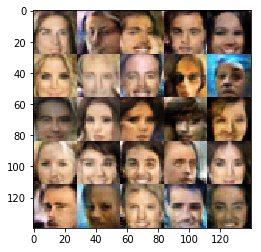

Epoch 4/4... Discr. Loss: 1.4033... Generator Loss: 0.8469
Epoch 4/4... Discr. Loss: 1.5693... Generator Loss: 0.6321
Epoch 4/4... Discr. Loss: 1.3590... Generator Loss: 0.6618
Epoch 4/4... Discr. Loss: 1.3616... Generator Loss: 0.6905
Epoch 4/4... Discr. Loss: 1.3304... Generator Loss: 0.8044
Epoch 4/4... Discr. Loss: 1.3467... Generator Loss: 0.7992
Epoch 4/4... Discr. Loss: 1.2692... Generator Loss: 0.9112
Epoch 4/4... Discr. Loss: 1.3056... Generator Loss: 0.7702
Epoch 4/4... Discr. Loss: 1.2881... Generator Loss: 0.7270
Epoch 4/4... Discr. Loss: 1.2810... Generator Loss: 0.7448


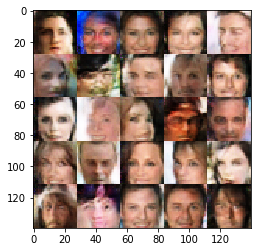

Epoch 4/4... Discr. Loss: 1.3363... Generator Loss: 0.6881
Epoch 4/4... Discr. Loss: 1.3619... Generator Loss: 0.8679
Epoch 4/4... Discr. Loss: 1.3025... Generator Loss: 0.7458
Epoch 4/4... Discr. Loss: 1.3468... Generator Loss: 0.7880
Epoch 4/4... Discr. Loss: 1.3061... Generator Loss: 0.7830
Epoch 4/4... Discr. Loss: 1.3107... Generator Loss: 0.7058
Epoch 4/4... Discr. Loss: 1.3710... Generator Loss: 0.6923
Epoch 4/4... Discr. Loss: 1.3583... Generator Loss: 0.7149
Epoch 4/4... Discr. Loss: 1.3359... Generator Loss: 0.8816
Epoch 4/4... Discr. Loss: 1.4388... Generator Loss: 0.8295


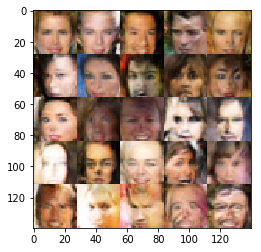

Epoch 4/4... Discr. Loss: 1.3312... Generator Loss: 0.6309
Epoch 4/4... Discr. Loss: 1.4298... Generator Loss: 0.7655
Epoch 4/4... Discr. Loss: 1.3422... Generator Loss: 0.6386
Epoch 4/4... Discr. Loss: 1.3147... Generator Loss: 0.8472
Epoch 4/4... Discr. Loss: 1.2828... Generator Loss: 0.8194
Epoch 4/4... Discr. Loss: 1.3845... Generator Loss: 0.7278
Epoch 4/4... Discr. Loss: 1.3531... Generator Loss: 0.7402
Epoch 4/4... Discr. Loss: 1.4035... Generator Loss: 0.7287
Epoch 4/4... Discr. Loss: 1.3846... Generator Loss: 0.8948
Epoch 4/4... Discr. Loss: 1.2851... Generator Loss: 0.7411


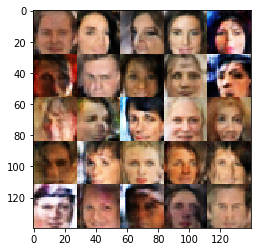

Epoch 4/4... Discr. Loss: 1.3489... Generator Loss: 0.7798
Epoch 4/4... Discr. Loss: 1.3902... Generator Loss: 0.7913
Epoch 4/4... Discr. Loss: 1.3015... Generator Loss: 0.8675
Epoch 4/4... Discr. Loss: 1.3775... Generator Loss: 0.7575
Epoch 4/4... Discr. Loss: 1.3580... Generator Loss: 0.6561
Epoch 4/4... Discr. Loss: 1.2480... Generator Loss: 0.6938
Epoch 4/4... Discr. Loss: 1.3724... Generator Loss: 0.6284
Epoch 4/4... Discr. Loss: 1.3162... Generator Loss: 0.7443
Epoch 4/4... Discr. Loss: 1.2662... Generator Loss: 0.7655
Epoch 4/4... Discr. Loss: 1.2621... Generator Loss: 0.7437


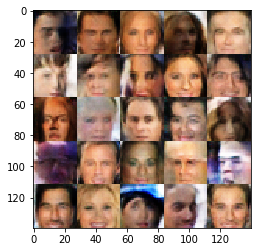

Epoch 4/4... Discr. Loss: 1.3988... Generator Loss: 0.7647
Epoch 4/4... Discr. Loss: 1.2452... Generator Loss: 0.8223
Epoch 4/4... Discr. Loss: 1.4413... Generator Loss: 0.6495
Epoch 4/4... Discr. Loss: 1.3294... Generator Loss: 0.6383
Epoch 4/4... Discr. Loss: 1.1835... Generator Loss: 0.8827
Epoch 4/4... Discr. Loss: 1.2841... Generator Loss: 0.7269
Epoch 4/4... Discr. Loss: 1.3267... Generator Loss: 0.8353
Epoch 4/4... Discr. Loss: 1.3239... Generator Loss: 0.7021
Epoch 4/4... Discr. Loss: 1.3461... Generator Loss: 0.7329
Epoch 4/4... Discr. Loss: 1.3583... Generator Loss: 0.8264


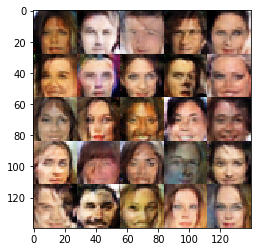

Epoch 4/4... Discr. Loss: 1.3162... Generator Loss: 0.7518
Epoch 4/4... Discr. Loss: 1.3102... Generator Loss: 0.9332
Epoch 4/4... Discr. Loss: 1.3853... Generator Loss: 0.6676
Epoch 4/4... Discr. Loss: 1.2324... Generator Loss: 0.8695
Epoch 4/4... Discr. Loss: 1.3313... Generator Loss: 0.7090
Epoch 4/4... Discr. Loss: 1.4431... Generator Loss: 0.6232
Epoch 4/4... Discr. Loss: 1.4127... Generator Loss: 0.6151
Epoch 4/4... Discr. Loss: 1.3512... Generator Loss: 1.0562
Epoch 4/4... Discr. Loss: 1.2317... Generator Loss: 0.8769
Epoch 4/4... Discr. Loss: 1.2894... Generator Loss: 0.6819


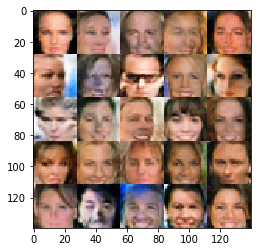

Epoch 4/4... Discr. Loss: 1.2877... Generator Loss: 0.7783
Epoch 4/4... Discr. Loss: 1.3720... Generator Loss: 0.7429


In [24]:
batch_size = 128
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 4

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.